# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semanas 3 y 4

**Rotación de Personal - IBM**

#### **Nombres y matrículas:**

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [123]:
# Incluye aquí todas las librerías que consideres necesarias:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


None


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [124]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

PATH = "../files/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(PATH, sep=",")
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


La principal diferencia del uso del argumento "include = all" es que al ocuparlo incluye las variables categóricas que en las columnas describen cuantas apariciones categóricas únicas existen, su frequencia y cuál fue la que más apareció. Adicionalmente añade todas las estadístcias descriptivas del df de su parte númerica.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: En la descripción de datos podemos observar que la variable Over18 tiene 1470 registros, tiene un sólo tipo de registro "Y" el cuál aparece 1470 veces, así haciendola una columna la cuál tiene un sólo valor por lo que el tenerla en el análisis no afecta en obtener futura onformación relevante.

**b)	EmployeeCount**: En la descripción de los datos podemos observar que la variable EmployeeCount tien 1470 registros. Tiene un promedio, valor mínimo y máximo junto con todos los cuartiles con valor de 1 y una desviación estándar de 0. Dándonos a entender que toda la columna es de valor 1 por lo que tenerla en el análisis no afevta en obtener futura información relevante.

**c)	StandardHours**: En la descripción de los datos podemos observar que la variable StandarHours tien 1470 registros. Tiene un promedio, valor mínimo y máximo junto con todos los cuartiles con valor de 80 y una desviación estándar de 0. Dándonos a entender que toda la columna es de valor 80 por lo que tenerla en el análisis no afevta en obtener futura información relevante.

**d)	EmployeeNumber**: El número de empleado no es relevante porque aunque sea una variable númerica no indica nada, es un número clasificatorio y se puede considerar de la misma forma que un nombre.

++++++++ Termina la sección de agregar texto. +++++++++++




In [125]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

In [126]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,1470.0,NaN,NaN,NaN,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
Gender,1470,2,Male,882,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df.JobLevel.unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [128]:
# Incluye en esta celda el código que consideres necesario para responder
# las preguntas del Ejercicio 5:
df_float = df.select_dtypes(include=['float64'])

ordinal_categorical = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating",
                                   "RelationshipSatisfaction", "WorkLifeBalance"]

binary_columns = []
for column in df.columns:
    unique_values = set(df[column])
    if len(unique_values) <= 2 and column != "Attrition":
        binary_columns.append(column)

df_int = df.select_dtypes(include=['int64'])
int_values = []
for column in df_int.columns:
    if not(column in binary_columns) and not(column in ordinal_categorical):
        int_values.append(column)

df_categorical_nominal = df.select_dtypes(include=['object'])
categorical_nominal = []
for column in df_categorical_nominal:
    if column != "Attrition":
        categorical_nominal.append(column)


print("Variables numericas de valor entero -->" , int_values, "\n")
print("Variables numericas de valor real -->" , df_float.columns, "\n")
print("Variables binarias-->" , binary_columns, "\n")
print("Variables categóricas Ordinales-->" , ordinal_categorical, "\n")
print("Variables categóricas nominales-->" , categorical_nominal, "\n")

Variables numericas de valor entero --> ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

Variables numericas de valor real --> Index([], dtype='object') 

Variables binarias--> ['Gender', 'OverTime', 'PerformanceRating'] 

Variables categóricas Ordinales--> ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'] 

Variables categóricas nominales--> ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'] 



#### **Realiza los análisis necesarios para encontrar cuántas y cuáles de las variables del nuevo DataFrame son:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

i.	variables numéricas de valor entero:

>>['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

ii.	variables numéricas de valor real (flotante):

>> None

iii.	variables binarias:

>> ['Attrition', 'Gender', 'OverTime', 'PerformanceRating'] 

iv.	variables categóricas nominales. Indica el total de niveles que tiene cada una de estas variables:

>> ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'] 

v.	variables categóricas ordinales. Indica el total de niveles que tiene cada una de estas variables:

>> ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'] 

++++++++ Termina la sección de agregar texto: ++++++++++++

# **Ejercicio 6:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

In [129]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Divide los datos en Entrenamiento (70%) y Prueba (30%)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Divide los datos de Prueba en Validación (50% de los datos de prueba)
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=42, stratify=ytest)

# Muestra las dimensiones de los conjuntos
print("Dimensiones de los conjuntos:")
print("Entrenamiento - X:", Xtrain.shape, " y:", ytrain.shape)
print("Validación - X:", Xval.shape, " y:", yval.shape)
print("Prueba - X:", Xtest.shape, " y:", ytest.shape)


# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Dimensiones de los conjuntos:
Entrenamiento - X: (1029, 30)  y: (1029,)
Validación - X: (220, 30)  y: (220,)
Prueba - X: (221, 30)  y: (221,)


# **Ejercicio 7:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las variables deberán seguir llamándose igual: ytrain, yval, ytest. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [130]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

le = LabelEncoder()

ytrain = le.fit_transform(ytrain)
yval = le.fit_transform(yval)
ytest = le.fit_transform(ytest)

train_proportions = {label: count / len(ytrain) for label, count in zip(le.classes_, np.bincount(ytrain))}
val_proportions = {label: count / len(yval) for label, count in zip(le.classes_, np.bincount(yval))}
test_proportions = {label: count / len(ytest) for label, count in zip(le.classes_, np.bincount(ytest))}

print("Proporción de datos en conjunto de entrenamiento:")
print(train_proportions)
print("\nProporción de datos en conjunto de validación:")
print(val_proportions)
print("\nProporción de datos en conjunto de prueba:")
print(test_proportions)

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

Proporción de datos en conjunto de entrenamiento:
{'No': 0.8386783284742468, 'Yes': 0.16132167152575316}

Proporción de datos en conjunto de validación:
{'No': 0.8409090909090909, 'Yes': 0.1590909090909091}

Proporción de datos en conjunto de prueba:
{'No': 0.8371040723981901, 'Yes': 0.16289592760180996}


Las proporciones de "Yes" y "No" son bastante similares en los tres conjuntos por lo que los datos están balanceados.

# **Ejercicio 8:**


#### **Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

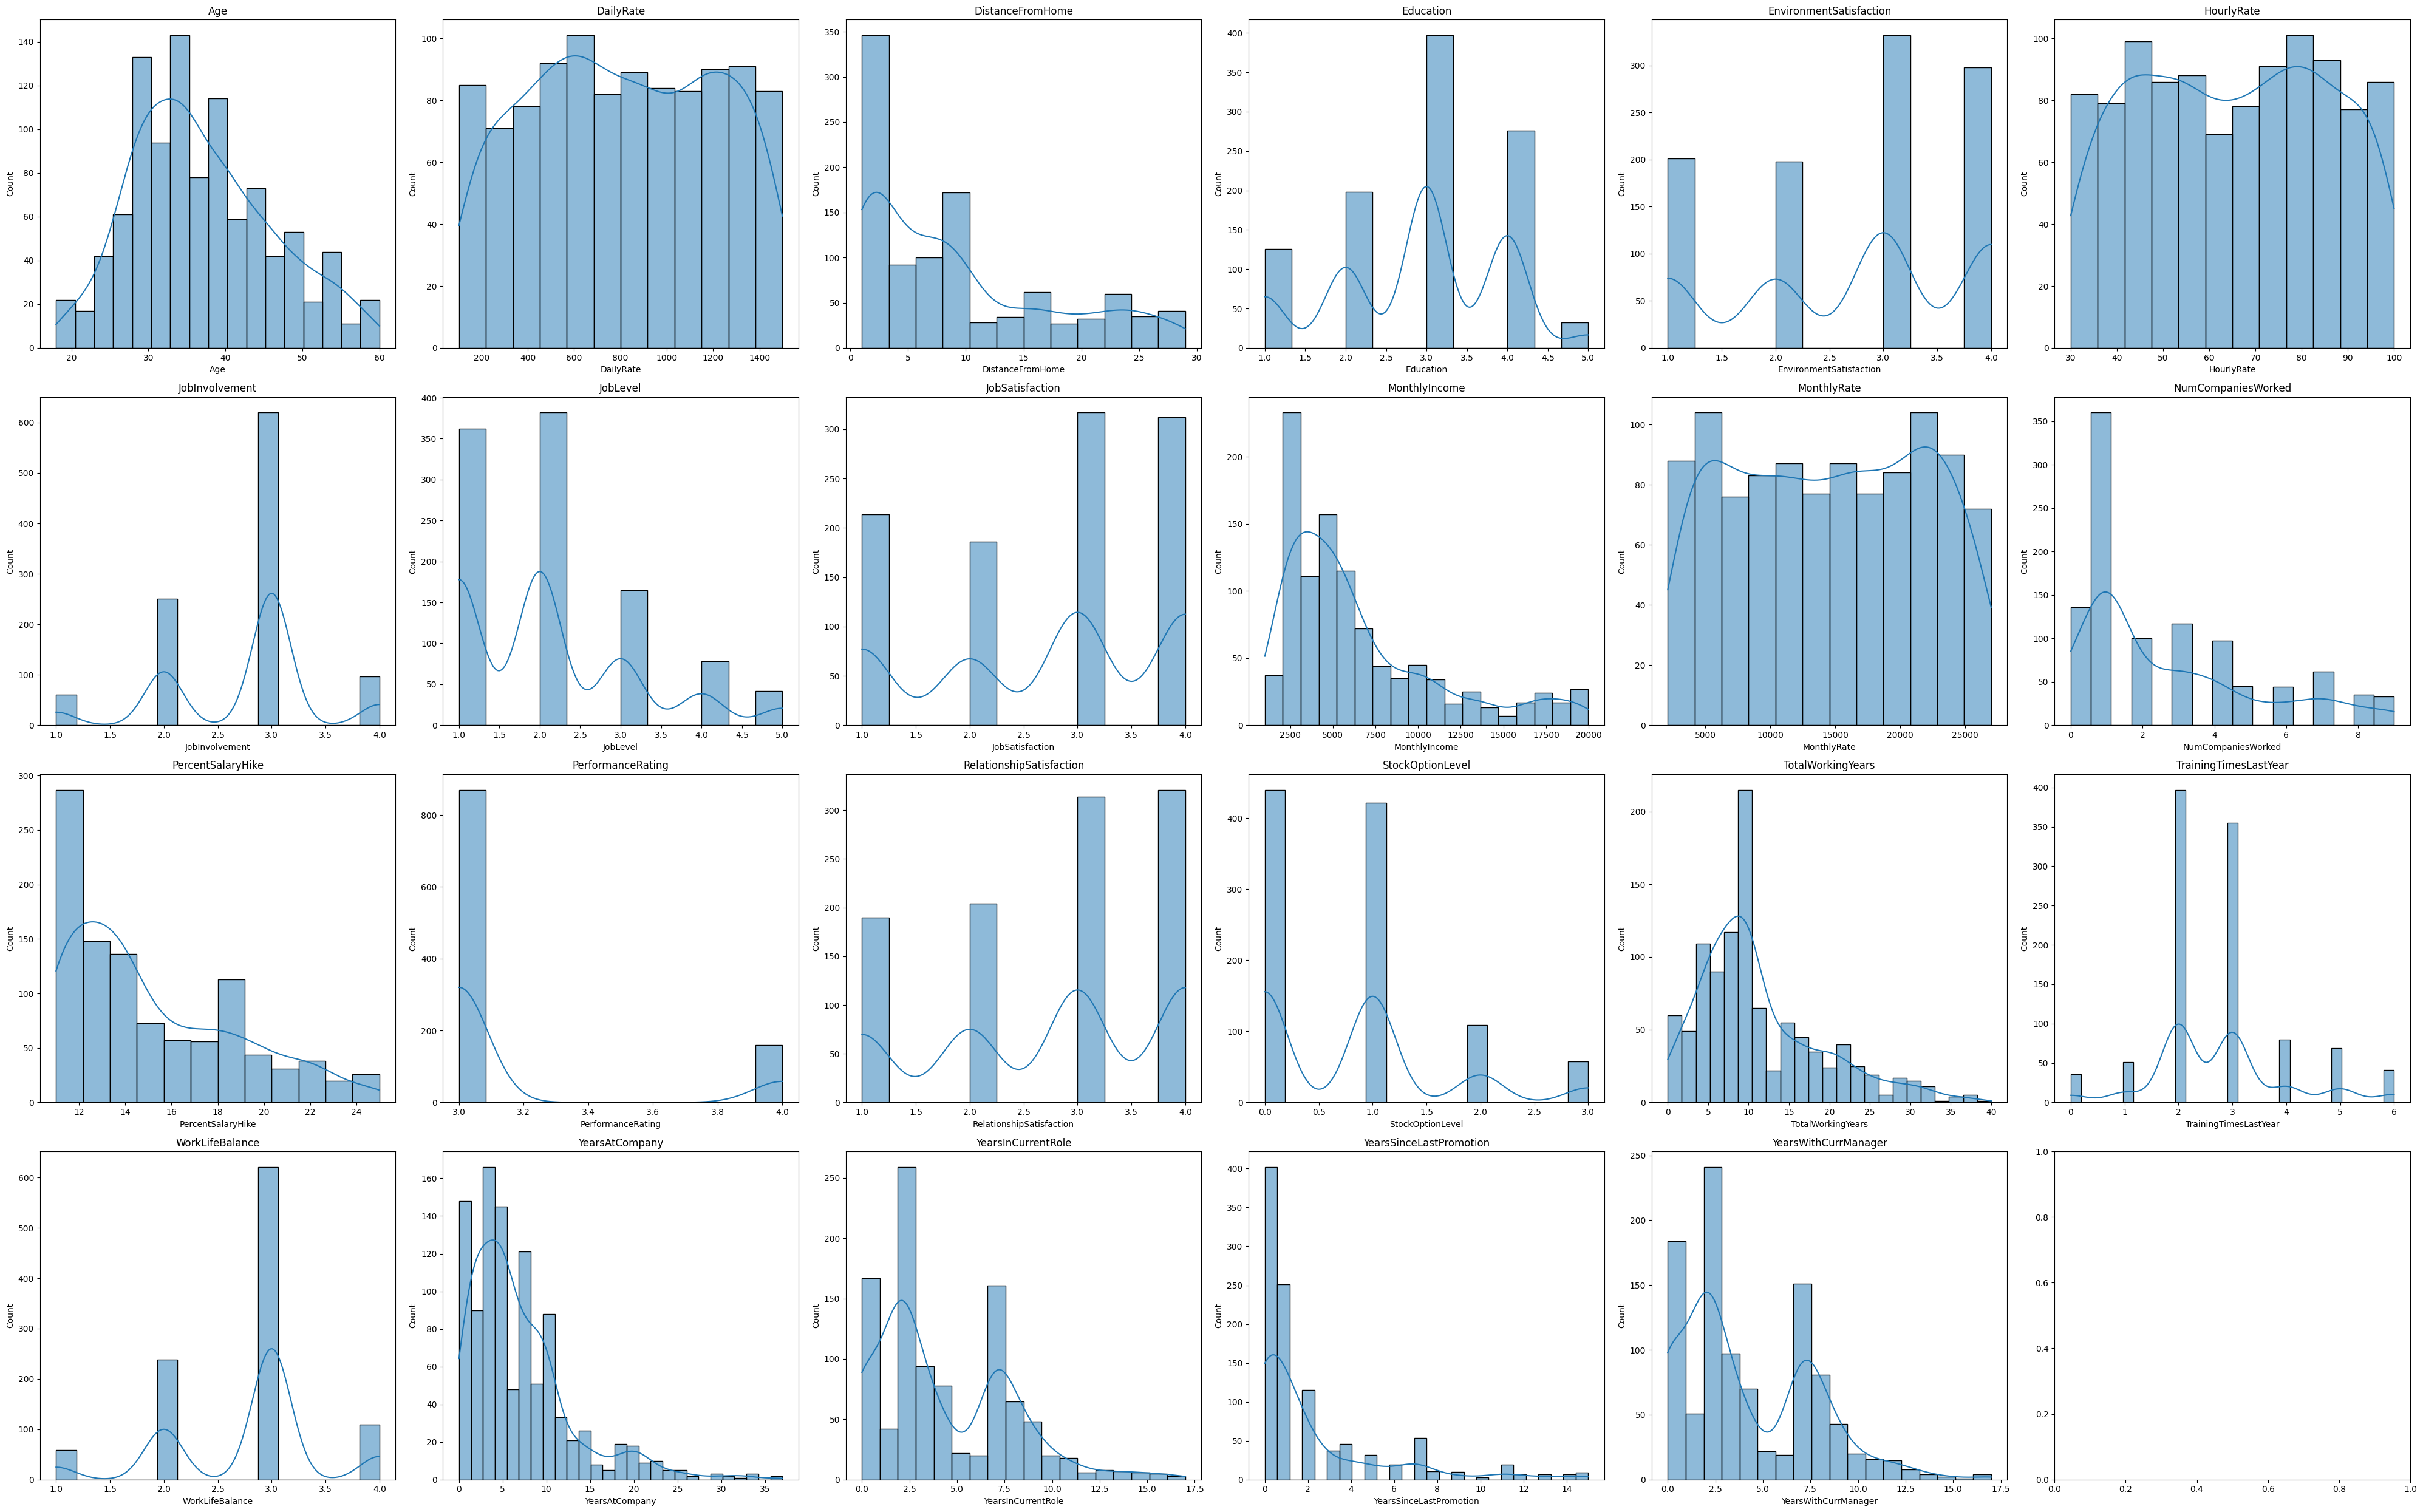

In [131]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

Xtrain_numerical = Xtrain.select_dtypes(include=['number'])
len(Xtrain_numerical.columns)

COLUMNS, ROWS = 4, 6

fig, axes = plt.subplots(COLUMNS, ROWS, figsize=(40, 25))

axes = axes.flatten()
for i, col in enumerate(Xtrain_numerical.columns):
    sns.histplot(x=Xtrain_numerical[col], ax=axes[i], kde = True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()
# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


En el caso de muchas gráficas, sus valores están un poco sesgados por lo que le aplicaría un transformación min max para hacerlas más acampanadas.

# **Ejercicio 9:**

#### **Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. En particular, deberás ilustrar gráficamente la relación entre las siguientes variables, las cuales pueden aportar información al problema que estamos enfrentando de rotación de personal.**

a)	Las variables “Age” y “Attrition”.

b)	Las variables “Department” y “Attrition”.

c)	Las variables “Gender” y “Attrition”.

d)	Incluye alguna otra relación o relaciones que consideres relevantes.

e)	Con base a los gráficos obtenidos incluye tus conclusiones al respecto.


Text(0.5, 1.0, 'MonthlyIncome vs Attrition')

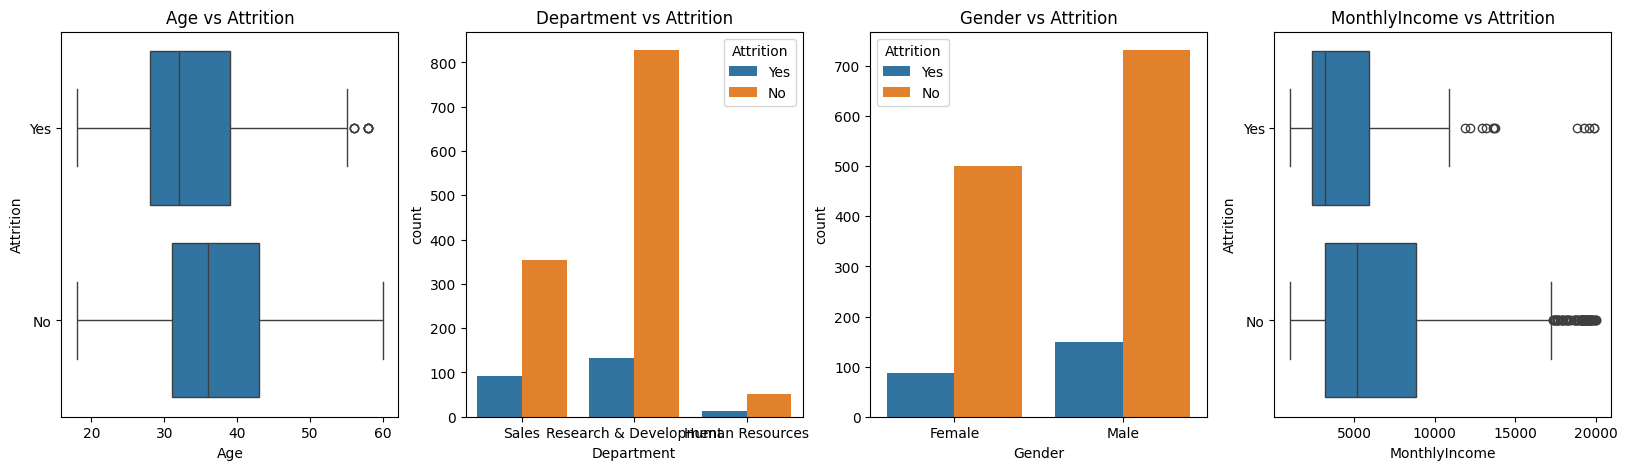

In [132]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(x=df["Age"], y = df["Attrition"], ax=axes[0])
sns.countplot(x=df["Department"], hue = df["Attrition"], ax=axes[1])
sns.countplot(x=df["Gender"], hue = df["Attrition"], ax=axes[2])
sns.boxplot(x=df["MonthlyIncome"], y = df["Attrition"], ax=axes[3])


axes[0].set_title("Age vs Attrition")
axes[1].set_title("Department vs Attrition")
axes[2].set_title("Gender vs Attrition")
axes[3].set_title("MonthlyIncome vs Attrition")


Podemos observar lo siguiente en las gráficas:
- Podemos ver que la gente con Attrition en la compañia es un poco más jóven que la que no, por lo que nuevas generaciones se refleja su desgaste.
- El departamento que más gente sin Attrition es Research & Development y todos los departamentos tienen pocas personas con Attrition.
- Hay más empleados hombres que mujeres y de igual manear más hombres tienen Attrition al momento de tranbajar.
- Podemos ver que la gente con Attrition en la compañía tiene sueldos significativamente más bajos que los que no, por lo que su salario mensual es un buen factor para los empleados.

# **Ejercicio 10:**

#### **Encontrar la matriz de correlación de Pearson entre variables numéricas y a partir de dicha matriz encuentra aquellas correlaciones fuertes, positivas o negativas.**

**NOTA: Decimos que una correlación es fuerte cuando el valor absoluto es mayor a 0.7.**


In [133]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

df_numerical = df.select_dtypes(include=['number'])
df_corr = df_numerical.corr()
display (df_corr)

for col in df_corr.columns:
    df_corr.loc[col, col] = pd.NA

filtered_corr = df_corr[(df_corr > 0.7) | (df_corr < -0.7)]
filtered_corr.dropna(axis=0, how='all', inplace=True)
filtered_corr.dropna(axis=1, how='all', inplace=True)
print("Variables con una correlación fuerte, mayor que 0.7 o menor que -0.7:")
display(filtered_corr)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


Variables con una correlación fuerte, mayor que 0.7 o menor que -0.7:


,JobLevel,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
JobLevel,NaN,0.950300,NaN,NaN,0.782208,NaN,NaN,NaN
MonthlyIncome,0.950300,NaN,NaN,NaN,0.772893,NaN,NaN,NaN
PercentSalaryHike,NaN,NaN,NaN,0.77355,NaN,NaN,NaN,NaN
PerformanceRating,NaN,NaN,0.77355,NaN,NaN,NaN,NaN,NaN
TotalWorkingYears,0.782208,0.772893,NaN,NaN,NaN,NaN,NaN,NaN
YearsAtCompany,NaN,NaN,NaN,NaN,NaN,NaN,0.758754,0.769212
YearsInCurrentRole,NaN,NaN,NaN,NaN,NaN,0.758754,NaN,0.714365
YearsWithCurrManager,NaN,NaN,NaN,NaN,NaN,0.769212,0.714365,NaN


# **Ejercicio 11:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**

**NOTA: A las variables numéricas aplica las transformaciones que hayas decidido en el Ejercicio 8; a las variables binarias y nominales puedes aplicarles las transformaciones One-Hot-Encoder; a las variables ordinales puedes aplicar la transformación OrdinalEncoder.**


In [134]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# NUMÉRICAS:
numericas_pipeline = Pipeline([('scaler', MinMaxScaler())])
numericas_pipeline_nombres = ['numericasMinMax']


# BINARIAS Y NOMINALES:
catOHE_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
catOHE_pipeline_nombres = ['catOHE']

# ORDINALES:
catOrd_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder())
])
catOrd_pipeline_nombres = ['catOrd']


columnasTransformer = ColumnTransformer([
    ('numericasMinMax', numericas_pipeline, int_values),
    ('catOHE', catOHE_pipeline, categorical_nominal + binary_columns),  # Columnas binarias y nominales
    ('catOrd', catOrd_pipeline, ordinal_categorical)  # Columnas ordinales
])
# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 12:**

#### **12)	Utilizando los conjuntos de entrenamiento y validación, encuentra los mejores hiperparámetros del modelo LogisticRegresion de Sklearn para obtener un modelo no sobre entrenado.**

**NOTA: Por el momento diremos que un modelo de clasificación no está sobreentrenado, si la diferencia de la exactitud (Accuracy) entre el conjunto de entrenamiento y el de validación es menor al 3%.**


In [135]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

modeloRL = LogisticRegression(random_state= 13)


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++


pipelineRL = Pipeline(steps=[('ct',columnasTransformer),('modeloRL',modeloRL)])
pipelineRL.fit(Xtrain, np.ravel(ytrain))

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numericasMinMax',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'HourlyRate', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole'...
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime', 'Gender',
                                                   'OverTime',
                                                   'PerformanceRating']),
                                                 ('catOrd',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'WorkLifeBalance'])])),
                ('modeloRL', LogisticRegression(random_state=13))])

In [136]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainRL = pipelineRL.predict(Xtrain)
y_pred_valRL = pipelineRL.predict(Xval)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainRL))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valRL))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valRL))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valRL))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:
accuracy-train 0.8950437317784257
accuracy-val 0.8863636363636364

>>Matriz de Confusión:
[[182   3]
 [ 22  13]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       185
           1       0.81      0.37      0.51        35

    accuracy                           0.89       220
   macro avg       0.85      0.68      0.72       220
weighted avg       0.88      0.89      0.87       220



# **Ejercicio 13:**

#### **Con base a la información del desempeño obtenido en el ejercicio anterior para los conjuntos de entrenamiento y validación, contesta los siguientes incisos:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

a)	¿Podemos decir que el modelo está subentrenado (underfitting) o sobreentrenado (overfitting)?

>> El modelo al tener una exactitud similar en el conjunto de entrenamiento y en el de validación, es poco probable que el modelo esté overfitted. Como no hay una diferencia significativa, no está ni overfitted o underfitted.

b)	Interpreta el valor numérico obtenido para la “precision” de la clase positiva.

>> El modelo dió un precisión de 0.81, esto significa que el 81% de las observaciones de la clase positiva clasificadas por el modelo fueron realmente positivas 

c)	Interpreta el valor numérico obtenido para el “recall” de la clase positiva.

>> El modelo dió un recall de 0.37, esto significa que el modelo identificó sólo el 37% de la clase positiva que de todas las observaciones fueron identificadas correctamente por el modelo. 

d)	Con base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.

>> Por lo general en el contexto de recurso shumanos son más caros los falsos negativos que los falsos positivos. El recall es la métrica más crítica para minimizar su valor. Preferiríamos identificar correctamente a la mayor cantidad posible de empleados en riesgo de rotación (falsos negativos bajos), aunque esto pueda resultar en un aumento de los falsos positivos.  

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 14:**

#### **Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los k Vecinos más Cercanos, kNN, usando la función KNeighborsClassifier() de Sklearn. Compara los resultados con el modelo de regresión logística e incluye tus conclusiones.**

In [137]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.
2
modelokNN = KNeighborsClassifier(n_neighbors=5, algorithm = "ball_tree", weights="uniform")


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++


pipelinekNN = Pipeline(steps=[('ct',columnasTransformer),('modeloRL',modelokNN)])
pipelinekNN.fit(Xtrain, np.ravel(ytrain))

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numericasMinMax',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'HourlyRate', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole'...
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime', 'Gender',
                                                   'OverTime',
                                                   'PerformanceRating']),
                                                 ('catOrd',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'WorkLifeBalance'])])),
                ('modeloRL', KNeighborsClassifier(algorithm='ball_tree'))])

In [138]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainkNN = pipelinekNN.predict(Xtrain)
y_pred_valkNN = pipelinekNN.predict(Xval)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainkNN))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valkNN))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valkNN))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valkNN))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:
accuracy-train 0.8862973760932945
accuracy-val 0.85

>>Matriz de Confusión:
[[184   1]
 [ 32   3]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       185
           1       0.75      0.09      0.15        35

    accuracy                           0.85       220
   macro avg       0.80      0.54      0.54       220
weighted avg       0.84      0.85      0.80       220



# **Ejercicio 15:**

#### **Utilizando el mejor modelo obtenido previamente (regresión logística o kNN), utiliza algún método de submuestreo (undersampling) o sobremuestreo (oversampling) que consideres adecuado de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados, para obtener el mejor modelo posible.**

**NOTA: Ver la documentación correspondiente:** https://imbalanced-learn.org/stable/references/


In [139]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(Xtrain, ytrain)

modeloRL2 = LogisticRegression(random_state= 13)

pipelineRL2 = Pipeline(steps=[('ct',columnasTransformer),('modeloRL',modeloRL2)])
pipelineRL2.fit(X_train_resampled, np.ravel(y_train_resampled))

c:\Users\81120609\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numericasMinMax',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'HourlyRate', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole'...
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime', 'Gender',
                                                   'OverTime',
                                                   'PerformanceRating']),
                                                 ('catOrd',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'WorkLifeBalance'])])),
                ('modeloRL', LogisticRegression(random_state=13))])

In [140]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainRL2 = pipelineRL.predict(Xtrain)
y_pred_valRL2 = pipelineRL.predict(Xval)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainRL2))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valRL2))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valRL2))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valRL2))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:
accuracy-train 0.8950437317784257
accuracy-val 0.8863636363636364

>>Matriz de Confusión:
[[182   3]
 [ 22  13]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       185
           1       0.81      0.37      0.51        35

    accuracy                           0.89       220
   macro avg       0.85      0.68      0.72       220
weighted avg       0.88      0.89      0.87       220



++++++++ Inicia la sección de agregar texto: ++++++++++++

#### **Con dicho modelo:**

**a)	Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

accuracy-train 0.8950437317784257
accuracy-val 0.8863636363636364

**b)	Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

Matriz de Confusión:


[[182   3]
|

 [ 22  13]]

Reporte varias métricas:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       185
           1       0.81      0.37      0.51        35

    accuracy                           0.89       220
   macro avg       0.85      0.68      0.72       220
weighted avg       0.88      0.89      0.87       220

**c)	¿Qué métrica es la que consideras que explica mejor el buen desempeño de nuestro modelo?**

El buen desempeño del modelo se explica mejor por su alta precisión en la predicción de empleados que no abandonarán la empresa.

**d)	Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

Al comparar los resultados, se observa que los modelos en ambos conjuntos tienen una precisión de validación muy similar, con el primer conjunto de resultados (accuracy-val 0.886) siendo ligeramente más alto que el segundo conjunto (accuracy-val 0.791). Ambos modelos muestran una mayor precisión en la clasificación de la clase negativa (empleados que no abandonan la empresa) en comparación con la clase positiva (empleados que abandonan la empresa), como lo demuestra la precisión y el recall más altos para la clase 0 en ambos conjuntos.

Sin embargo, hay algunas diferencias notables en los modelos. El primer conjunto de resultados tiene una mayor precisión y recall para la clase positiva (0.81 y 0.37 respectivamente) en comparación con el segundo conjunto (0.40 y 0.63 respectivamente). Esto sugiere que el primer modelo tiene una mejor capacidad para identificar correctamente a los empleados que abandonarán la empresa. Además, el primer modelo tiene menos falsos negativos en comparación con el segundo modelo, lo que indica una mejor capacidad para identificar correctamente los casos positivos. 

++++++++ Termina la sección de agregar texto: ++++++++++++

# **Ejercicio 16:**

#### **Con base al mejor modelo que hayas obtenido hasta ahora, aplica la técnica de permutación de los factores con el método “permutation_importance()” de Sklearn, para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin). Utiliza el conjunto de validación.**
**b)	¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo?**

Los factores que más influyen en que un empleado abandone su trabajo empiezan con el Overtime (señal de mal balance profesional y personal), luego JobInvolment donde es escencial para el empleado donde afecta la siguiente variable de JobRole y estas 3 variables nos muestran que tienen un impacto en la salud emocional y mental de un empleado teniendo como referente que en las nuevas generaciones se tiene más consciencia de ello y causa que un empleado abandone su trabajo.

++++++++ Termina la sección de agregar texto: ++++++++++++


In [141]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

result = permutation_importance(pipelineRL, Xval, yval, n_repeats=10, random_state=42)

# Obtener los resultados de importancia de las características
importances = result.importances_mean
std = result.importances_std

# Crear un DataFrame para guardar los resultados
df_importances = pd.DataFrame({'Feature': X.columns, 'Importance_Mean': importances, 'Importance_Std': std})

# Ordenar los resultados por importancia promedio en orden descendente
df_importances = df_importances.sort_values(by='Importance_Mean', ascending=False)


In [142]:
display(df_importances)

,Feature,Importance_Mean,Importance_Std
18,OverTime,0.055455,0.012984
12,JobRole,0.017727,0.011217
10,JobInvolvement,0.017727,0.008492
1,BusinessTravel,0.016364,0.010602
28,YearsSinceLastPromotion,0.015455,0.006492
14,MaritalStatus,0.015000,0.006115
25,WorkLifeBalance,0.012273,0.005000
13,JobSatisfaction,0.010909,0.010985
23,TotalWorkingYears,0.009545,0.006571
17,NumCompaniesWorked,0.009091,0.004979


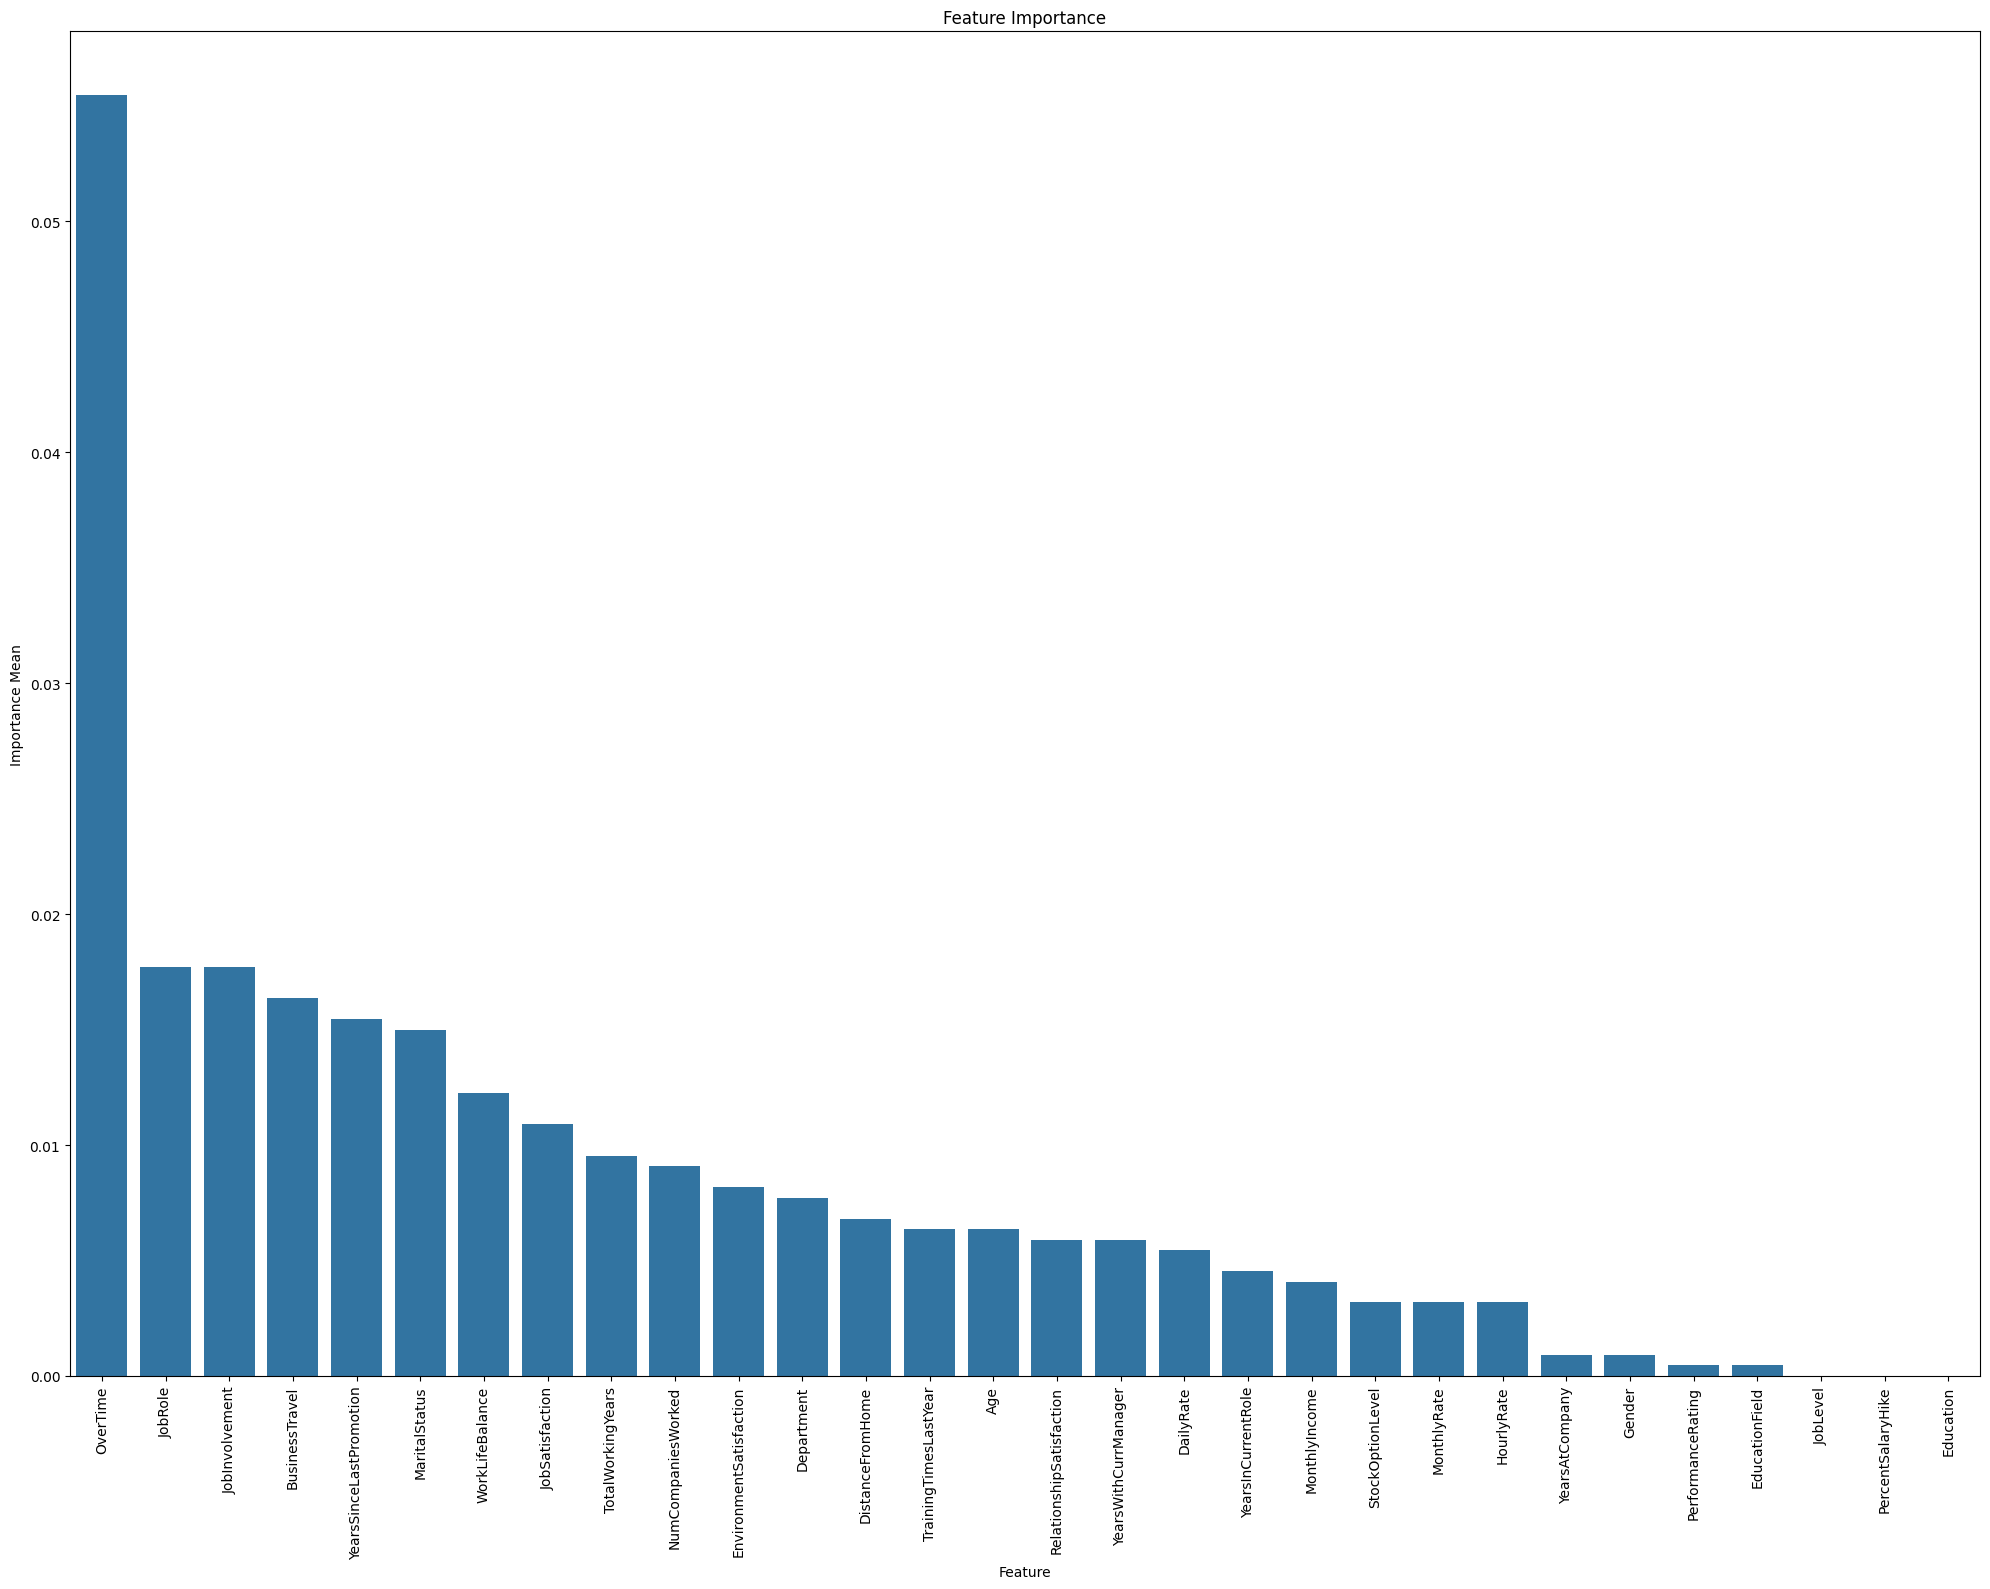

In [143]:
plt.figure(figsize=(20, 16))
sns.barplot(x =  df_importances["Feature"], y = df_importances["Importance_Mean"])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Mean")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# **Ejercicio 17:**

#### **Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal. Forma un nuevo conjunto de Entrenamiento con los conjuntos de entrenamiento y validación y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo, desplegando la siguiente información:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.**

**b)	Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.**

La precisión se refiere a la proporción de empleados identificados como propensos a abandonar la empresa que realmente lo hacen. En este caso, el 75% de los empleados identificados como propensos a abandonar la empresa lo hacen realmente. Esto indica que el modelo es selectivo en sus predicciones y no clasifica incorrectamente muchos empleados como propensos a abandonar la empresa.

El recall, o sensibilidad, indica la proporción de empleados que realmente abandonan la empresa y que fueron correctamente identificados por el modelo. En este caso, solo el 50% de todos los empleados que realmente abandonan la empresa son correctamente identificados por el modelo. Un recall más bajo sugiere que el modelo no está capturando adecuadamente todos los casos positivos y está dejando algunos empleados propensos a abandonar la empresa sin identificarlos.

El F1-score es una medida que combina precisión y recall en una sola métrica. Es útil cuando hay un desequilibrio entre las clases, como en el caso de rotación de personal. En este caso, el F1-score para la clase positiva es del 60%, lo que indica un equilibrio entre precisión y recall. Sin embargo, dado que el recall es más bajo que la precisión, el F1-score también es relativamente bajo, lo que sugiere que el modelo no está equilibrando adecuadamente la identificación de todos los casos positivos con la precisión de esas predicciones.

El modelo tiene una precisión razonablemente alta para predecir empleados propensos a abandonar la empresa, su capacidad para identificar correctamente a todos los empleados que realmente abandonan la empresa es limitada. Esto sugiere que el modelo podría beneficiarse de una mejora en la identificación de casos positivos, posiblemente mediante la optimización de los umbrales de clasificación o la exploración de técnicas de ajuste del modelo.

++++++++ Termina la sección de agregar texto: ++++++++++++

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(Xtest, ytest, test_size=0.5, random_state=42, stratify=ytest)

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

In [153]:
modeloRL = LogisticRegression(random_state= 13)

pipelineRL = Pipeline(steps=[('ct',columnasTransformer),('modeloRL',modeloRL)])
pipelineRL.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numericasMinMax',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'HourlyRate', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole'...
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime', 'Gender',
                                                   'OverTime',
                                                   'PerformanceRating']),
                                                 ('catOrd',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'WorkLifeBalance'])])),
                ('modeloRL', LogisticRegression(random_state=13))])

In [154]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainRL = pipelineRL.predict(X_train)
y_pred_testRL = pipelineRL.predict(X_test)
print('accuracy-train', metrics.accuracy_score(y_train, y_pred_trainRL))
print('accuracy-test', metrics.accuracy_score(y_test, y_pred_testRL))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(y_test, y_pred_testRL))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(y_test, y_pred_testRL))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:
accuracy-train 0.8950437317784257
accuracy-test 0.8918918918918919

>>Matriz de Confusión:
[[90  3]
 [ 9  9]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        93
           1       0.75      0.50      0.60        18

    accuracy                           0.89       111
   macro avg       0.83      0.73      0.77       111
weighted avg       0.88      0.89      0.88       111



# >> **Fin de la Actividad de las Semanas 3 y 4** <<